In [1]:
# 데이터 추출
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)#한번에 사용하는 문장은 500단어로 구성되는 거.
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [2]:
# RNN 모델 훈련

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
#embedding 문자를 숫자로. 단어를 집어넣어서 의미있는 단어로 벡터화 시키는걸 워드화라고 말함. 연관성 있는 단어들끼리 붙여놓는거?

model = Sequential()
model.add(Embedding(max_features, 32))#embedding 레이어를 거치면 내가 넣은 단어가 벡터화 되어서 input이 숫자로. 벡터 형태로 들어가게 된다.
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))#좋은 평 나쁜 평

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 42s 2ms/step - loss: 0.5701 - acc: 0.6949 - val_loss: 0.4866 - val_acc: 0.7694
Epoch 2/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.3605 - acc: 0.8510 - val_loss: 0.3407 - val_acc: 0.8618
Epoch 3/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.2624 - acc: 0.8991 - val_loss: 0.6257 - val_acc: 0.7810
Epoch 4/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.2209 - acc: 0.9152 - val_loss: 0.4614 - val_acc: 0.8228
Epoch 5/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.1859 - acc: 0.9306 - val_loss: 0.4159 - val_acc: 0.8374
Epoch 6/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.1321 - acc: 0.9532 - val_loss: 0.5512 - val_acc: 0.7686
Epoch 7/10
20000/20000

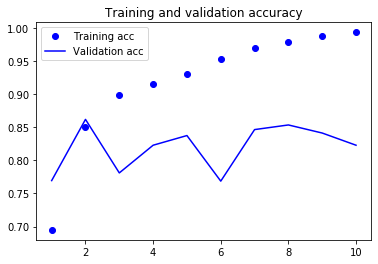

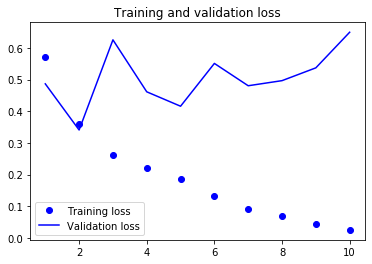

In [3]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()